In [4]:
import pyreadr
import pandas as pd
import numpy as np

## Load training data

In [6]:
# Ozone concentration time series
result = pyreadr.read_r('minichallenge/data/Challenge_Data_O3_2015.rds')
df1 = result[None]

In [7]:
df1

,Organisme,Station,Mesure,Valeur,idPolair,date
0,15,13,9,13.0,15013,2015-01-01 00
1,15,13,9,12.0,15013,2015-01-01 01
2,15,13,9,28.0,15013,2015-01-01 02
3,15,13,9,13.0,15013,2015-01-01 03
4,15,13,9,30.0,15013,2015-01-01 04
...,...,...,...,...,...,...
648235,7,58,10,NaN,7058,2015-12-31 19
648236,7,58,10,NaN,7058,2015-12-31 20
648237,7,58,10,NaN,7058,2015-12-31 21
648238,7,58,10,NaN,7058,2015-12-31 22


In [8]:
# CHIMERE Ozone forecasts
result2 = pyreadr.read_r('minichallenge/data/CHIMERE_O3_2015.rds')
df2 = result2[None]

In [9]:
df2

,date,val,idPolair,param
0,2015-01-01 00:00:00,44.8,15017.0,O3
1,2015-01-01 00:00:00,44.9,15018.0,O3
2,2015-01-01 00:00:00,45.4,15038.0,O3
3,2015-01-01 00:00:00,45.3,15039.0,O3
4,2015-01-01 00:00:00,45.4,15043.0,O3
...,...,...,...,...
937422,2016-01-01 00:00:00,58.9,7052.0,O3
937423,2016-01-01 00:00:00,65.6,7056.0,O3
937424,2016-01-01 00:00:00,51.6,7057.0,O3
937425,2016-01-01 00:00:00,58.3,7058.0,O3


## View the stations

In [11]:
# Concentration measures
pd.unique(df1['idPolair'])

array(['15013', '15017', '15018', '15031', '15038', '15043', '15045',
       '15048', '15049', '20004', '20017', '20037', '20045', '20046',
       '20047', '20048', '20049', '20061', '20062', '27002', '27003',
       '27004', '27005', '27007', '27010', '29421', '29423', '29424',
       '29426', '29439', '29440', '33101', '33102', '33111', '33120',
       '33121', '33201', '33202', '33211', '33212', '33220', '33302',
       '33305', '33414', '33233', '33303', '36001', '36002', '36005',
       '36019', '36021', '7009', '7004', '7001', '7051', '7032', '7045',
       '7013', '7016', '7049', '7017', '7014', '7054', '7012', '7018',
       '7015', '7020', '7022', '7031', '7029', '7052', '7056', '7057',
       '7058'], dtype=object)

In [12]:
# CHIMERE Forecasts
pd.unique(df2['idPolair'])

array([15017., 15018., 15038., 15039., 15043., 15045., 15046., 15048.,
       20013., 20017., 20019., 20029., 20031., 20037., 20045., 20046.,
       20047., 20048., 20061., 20062., 20065., 20069., 20070., 27002.,
       27004., 27007., 27008., 29423., 29424., 29426., 29428., 29429.,
       29439., 29440., 29441., 33102., 33105., 33111., 33114., 33120.,
       33121., 33122., 33201., 33202., 33203., 33211., 33213., 33220.,
       33232., 33235., 33302., 33305., 33367., 36001., 36002., 36003.,
       36019., 36021.,  7004.,  7009.,  7010.,  7022.,  7028.,  7031.,
        7034.,  7039.,  7042.,  7045.,  7049.,  7051.,  7054., 15013.,
       20004., 20049., 27005., 27010., 33101.,  7001.,  7013.,  7017.,
        7032., 15031., 27003.,  7015.,  7016.,  7018.,  7020.,  7029.,
       15114., 20063., 29421., 33212., 33414., 33233., 33303., 36005.,
        7053.,  7048.,  7014.,  7011.,  7012.,  7043.,  7052.,  7056.,
        7057.,  7058., 15049.])

## Get one station

In [14]:
sel_id_chimere = df2.loc[df2['idPolair'] == 15018]
sel_id_values = df1.loc[df1['idPolair'] == '15018']

## View the datetime days associated with times series

In [20]:
import datetime
datetime.datetime.today().weekday()

0

In [23]:
num_day= pd.to_datetime(sel_id_values['date']).dt.weekday.to_numpy()
num_day[::24]

array([3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,

In [24]:
num_day= pd.to_datetime(sel_id_chimere['date']).dt.weekday.to_numpy()
num_day[::24]

array([3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,

<IPython.core.display.Javascript object>


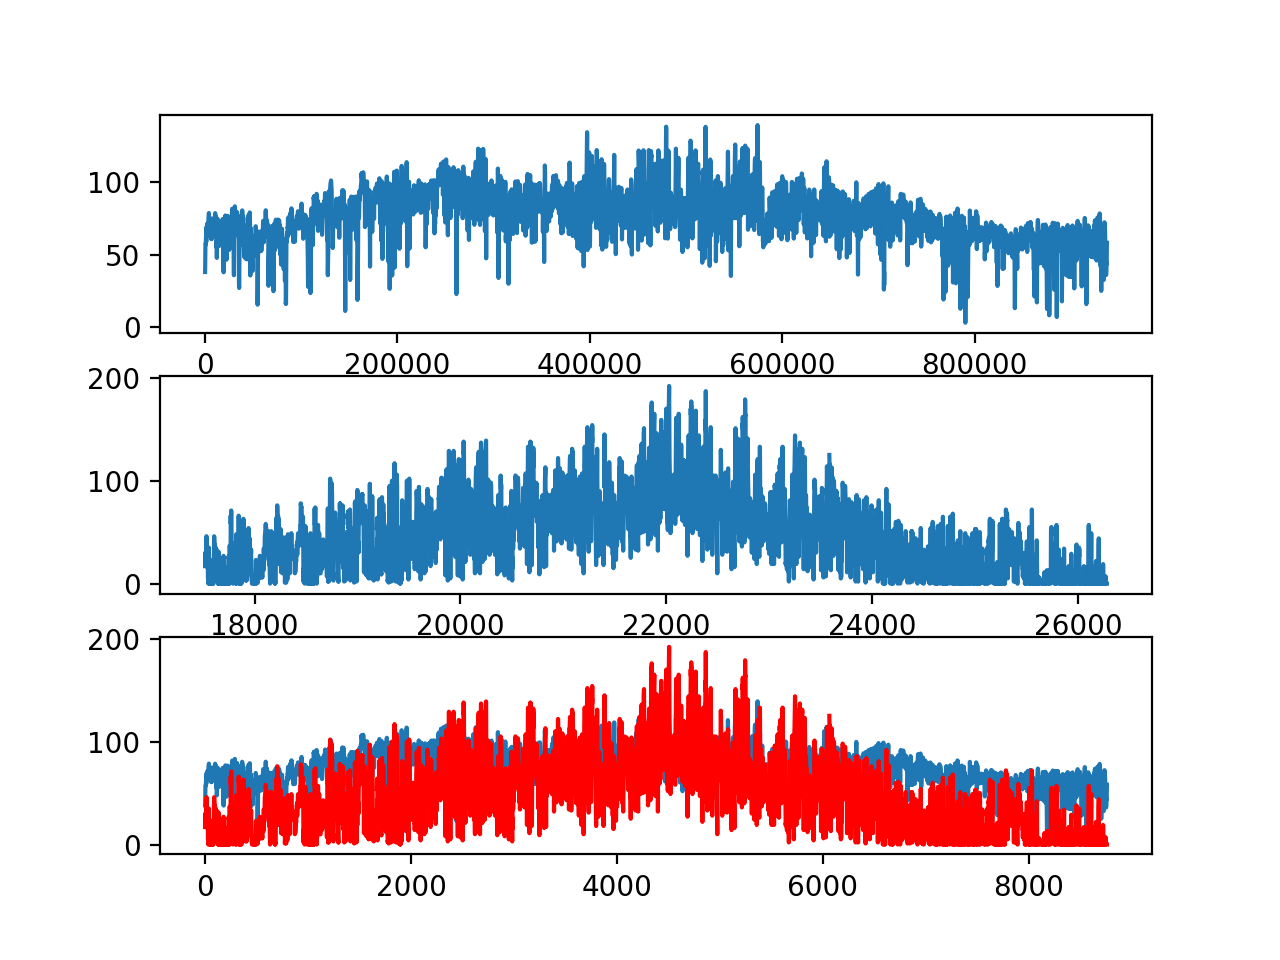

In [37]:
import matplotlib.pyplot as plt
%matplotlib notebook

num_day= pd.to_datetime(sel_id_chimere['date']).dt.weekday.to_numpy()

plt.subplot(311)
plt.plot(sel_id_chimere['val'][1:] )
#plt.xticks(np.arange(0,num_day.size,24),num_day[::24])
plt.subplot(312)
plt.plot(sel_id_values['Valeur'])
plt.subplot(313)
plt.plot(sel_id_chimere['val'][1:].to_numpy() )
plt.plot(sel_id_values['Valeur'].to_numpy(),'r')

## How to visualize/manage NaN

In [39]:
np.any(sel_id_values['Valeur'].isna())

True

In [42]:
np.where(sel_id_values['Valeur'].isna())[0]

array([1119, 1120, 1382, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649,
       1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660,
       1661, 1662, 1663, 1664, 1665, 1666, 1667, 3873, 3874, 6009, 6010,
       6011, 6012, 6013, 6014, 6015, 6016, 6017, 6018, 6019, 6020, 6021,
       6022, 6023, 6024, 6062, 7234, 8075])

In [47]:
y_fillna = sel_id_values['Valeur'].fillna('method'=='bfill')

In [48]:
np.any(y_fillna.isna())

False